## Code to optimize a curve fit for log(P_c) using b*log(1-exp(x-a))+c, uses least squares

In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

In [4]:
df = pd.read_csv('/homes/fed1/Survival_Franny/formatted_net_SEER_survival_by_cause_age_sex_year.csv')

In [3]:
df['t'] = df['interval']+1

df = df[df.year==0]
df = df[df.sex==3]
df = df[df.age_name=="All Ages"]

df['P_c'] = 1 - df['net_survival']

In [4]:
#with_P_c = df[df.t==1]
for cancer in df.cause_name.unique():
    index_1 = (df.cause_name==cancer)
    df.loc[(index_1)&(df.t>1), 'P_c']=1-df.net_survival[index_1].values[1:]/df.net_survival[index_1].values[:-1]
    #with_P_c = pd.merge(with_P_c, df_cause, how='outer')

In [5]:
df = df.dropna()
df = df[df['P_c']!=0]
df['log_P_c'] = np.log(df['P_c'])

In [6]:
# define the functional form to fit
def function(x,t):
    return x[1]*np.log(1 + np.exp(-(t-x[0])))+x[2]

def model(x, t, y):
    return function(x,t)-y

In [7]:
# starting values
x_0 = np.array([1.0,1.0,1.0])

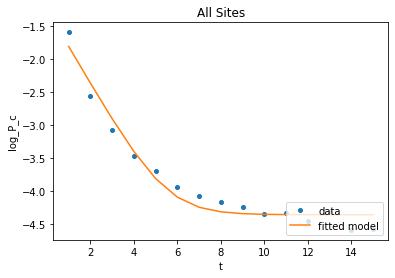

  cause_name         a         b        c
0  All Sites  5.486001  0.566051 -4.35535


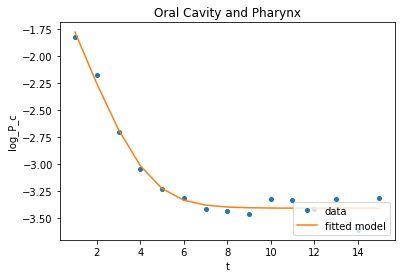

                cause_name         a         b         c
0  Oral Cavity and Pharynx  4.150743  0.509668 -3.407876


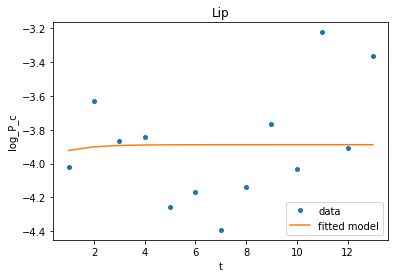

  cause_name         a           b         c
0        Lip -7.535811 -173.056428 -3.888515


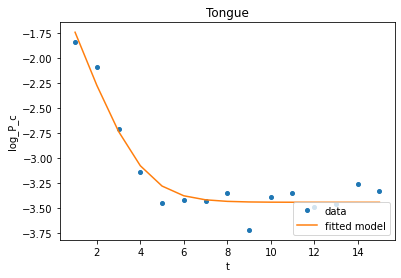

  cause_name         a         b         c
0     Tongue  3.866205  0.582127 -3.438999


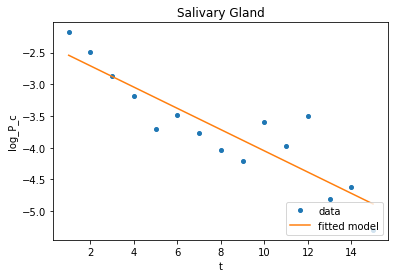

       cause_name         a         b          c
0  Salivary Gland  52.22522  0.167383 -11.117194


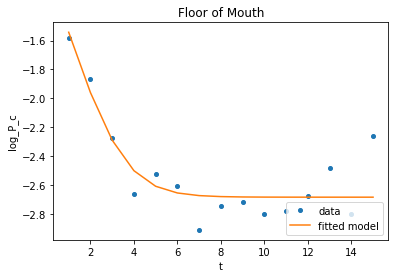

       cause_name         a         b         c
0  Floor of Mouth  3.194173  0.496754 -2.684757


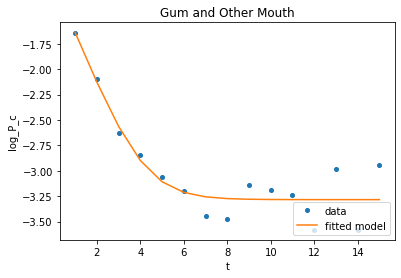

            cause_name         a        b         c
0  Gum and Other Mouth  4.070849  0.52863 -3.283378


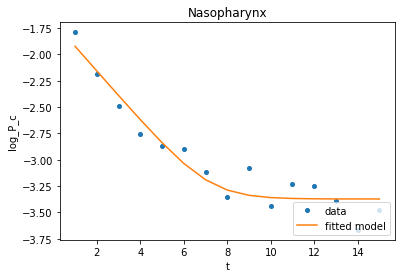

    cause_name         a         b         c
0  Nasopharynx  7.164411  0.235086 -3.372394


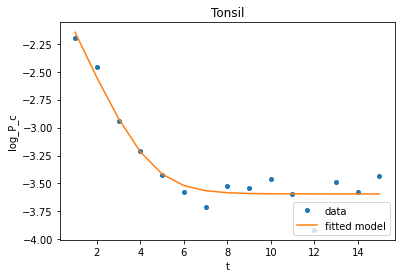

  cause_name         a         b         c
0     Tonsil  4.343536  0.428104 -3.593537


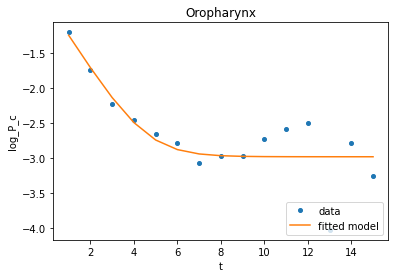

   cause_name         a         b         c
0  Oropharynx  4.551162  0.484289 -2.981118


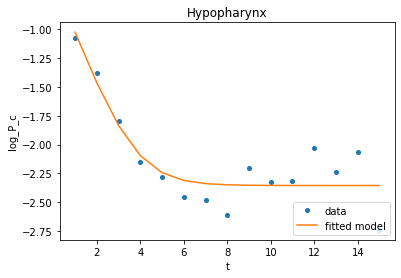

    cause_name         a         b         c
0  Hypopharynx  3.635279  0.492048 -2.355334


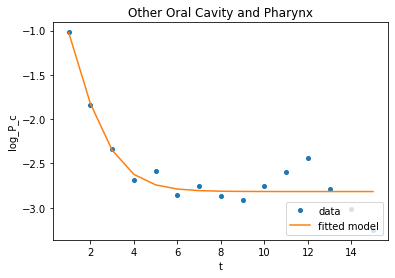

                      cause_name         a        b         c
0  Other Oral Cavity and Pharynx  2.278078  1.17778 -2.816533


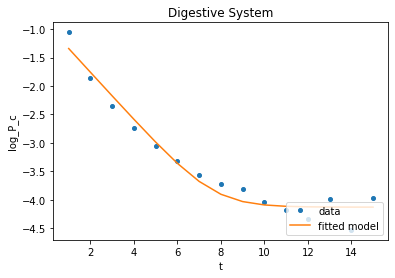

         cause_name         a         b         c
0  Digestive System  7.669681  0.418578 -4.131762


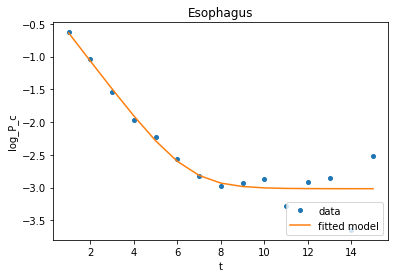

  cause_name         a         b         c
0  Esophagus  6.482311  0.433271 -3.017467


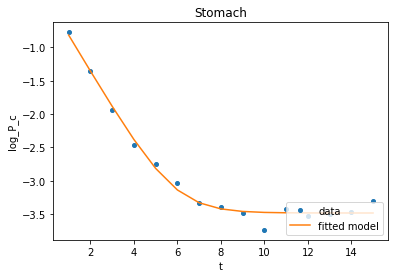

  cause_name         a        b        c
0    Stomach  5.874964  0.54645 -3.48385


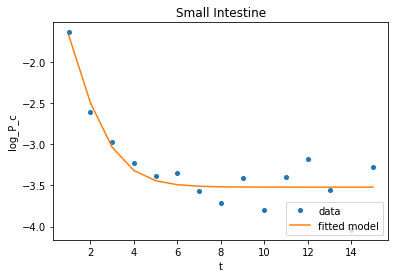

        cause_name        a         b         c
0  Small Intestine  2.30913  1.191913 -3.521555


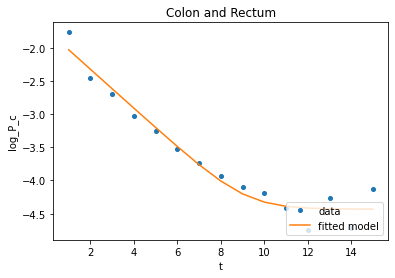

         cause_name         a         b         c
0  Colon and Rectum  9.173131  0.293932 -4.432821


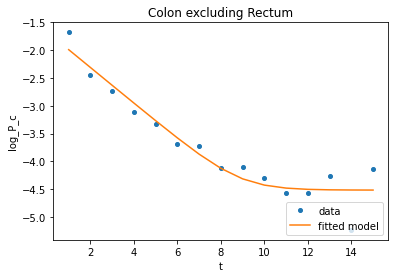

               cause_name         a         b         c
0  Colon excluding Rectum  8.871459  0.320813 -4.515338


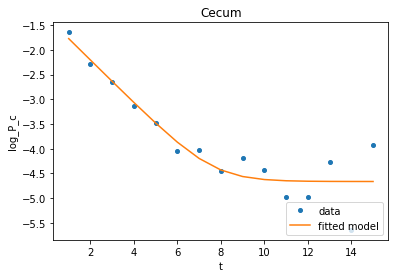

  cause_name         a        b         c
0      Cecum  7.657257  0.43392 -4.663105


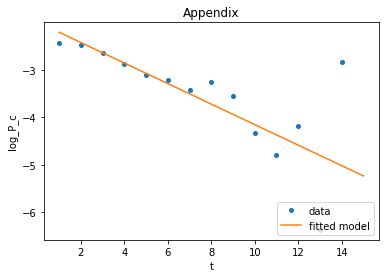

  cause_name           a         b          c
0   Appendix  134.812984  0.216181 -31.137501


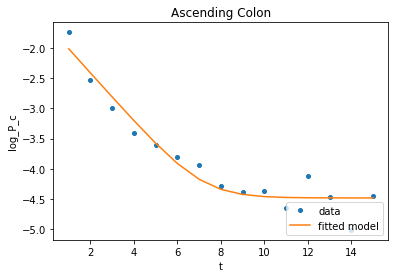

        cause_name         a         b         c
0  Ascending Colon  7.144787  0.402178 -4.482694


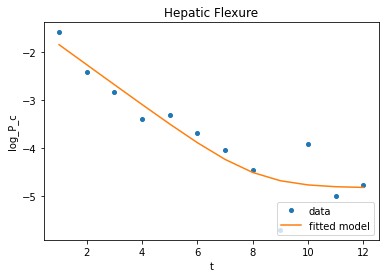

        cause_name         a         b         c
0  Hepatic Flexure  8.140696  0.418012 -4.824584


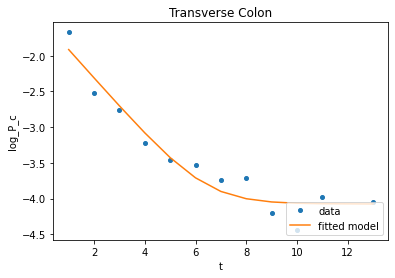

         cause_name         a         b         c
0  Transverse Colon  6.407558  0.399567 -4.076523


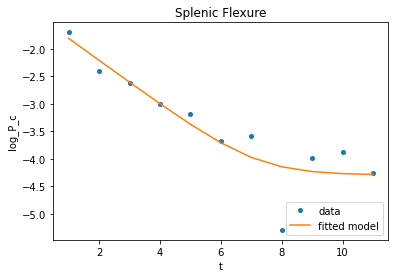

        cause_name         a         b         c
0  Splenic Flexure  7.192512  0.400454 -4.290642


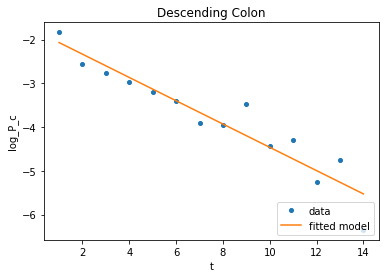

         cause_name          a         b          c
0  Descending Colon  41.313918  0.266043 -12.793232


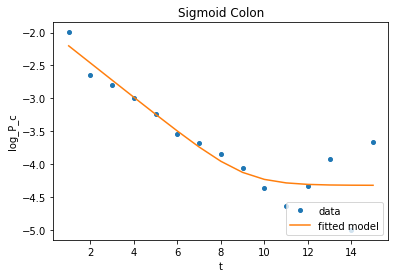

      cause_name         a         b         c
0  Sigmoid Colon  9.115215  0.261031 -4.320047


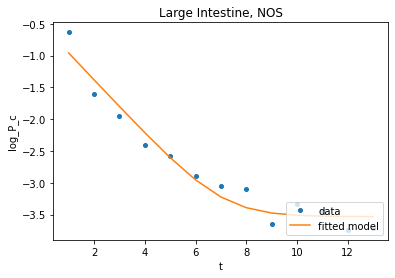

             cause_name         a         b         c
0  Large Intestine, NOS  7.075103  0.423734 -3.534501


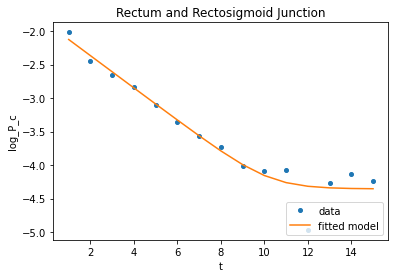

                         cause_name          a         b         c
0  Rectum and Rectosigmoid Junction  10.250458  0.241009 -4.355288


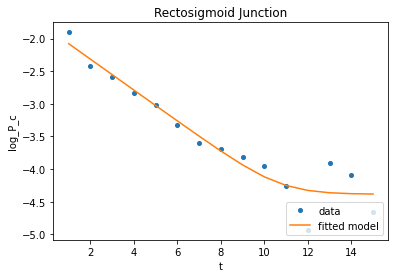

              cause_name          a         b         c
0  Rectosigmoid Junction  10.733371  0.237019 -4.386478


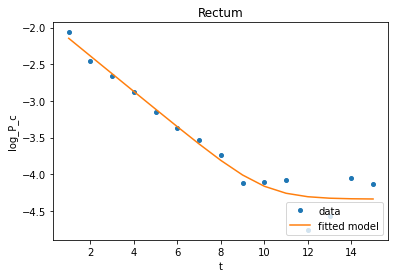

  cause_name          a         b         c
0     Rectum  10.059017  0.242047 -4.338746


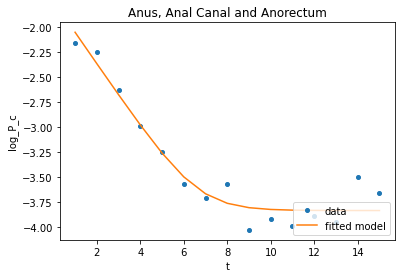

                       cause_name         a         b         c
0  Anus, Anal Canal and Anorectum  6.644856  0.315749 -3.833138


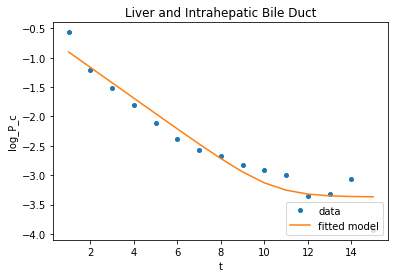

                         cause_name          a         b         c
0  Liver and Intrahepatic Bile Duct  10.402088  0.262341 -3.370368


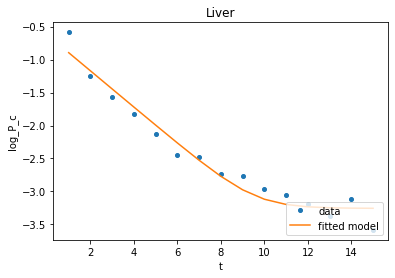

  cause_name         a         b         c
0      Liver  9.576181  0.275331 -3.256574


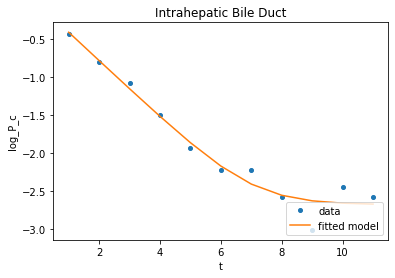

               cause_name         a         b        c
0  Intrahepatic Bile Duct  7.056619  0.375288 -2.67882


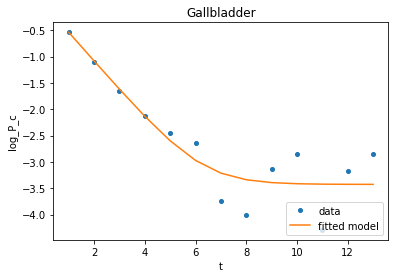

    cause_name         a         b         c
0  Gallbladder  6.259152  0.548426 -3.426904


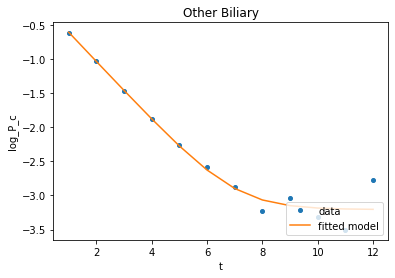

      cause_name         a         b         c
0  Other Biliary  7.047875  0.428995 -3.205689


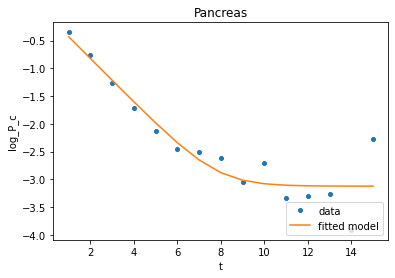

  cause_name         a         b         c
0   Pancreas  7.839965  0.393602 -3.123448


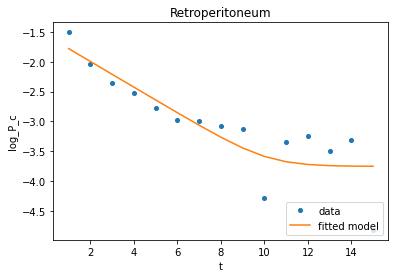

        cause_name          a         b         c
0  Retroperitoneum  10.162647  0.215513 -3.754795


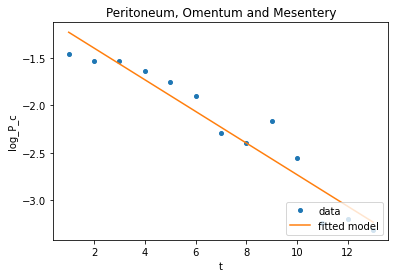

                          cause_name          a         b         c
0  Peritoneum, Omentum and Mesentery  31.979428  0.166808 -6.397707


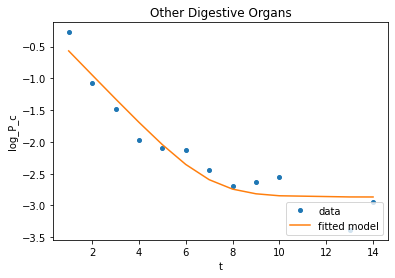

               cause_name         a        b         c
0  Other Digestive Organs  7.047044  0.37995 -2.866569


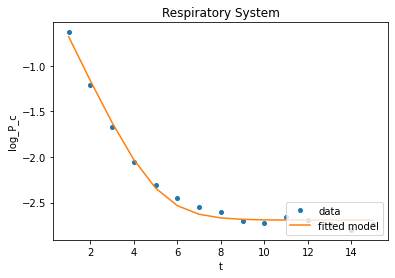

           cause_name         a         b         c
0  Respiratory System  5.022283  0.497947 -2.692186


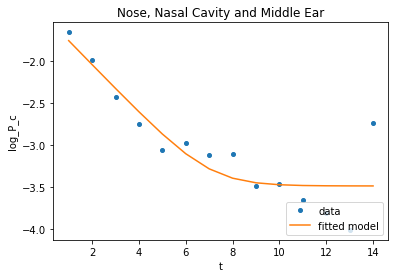

                          cause_name        a         b         c
0  Nose, Nasal Cavity and Middle Ear  7.03485  0.286107 -3.482516


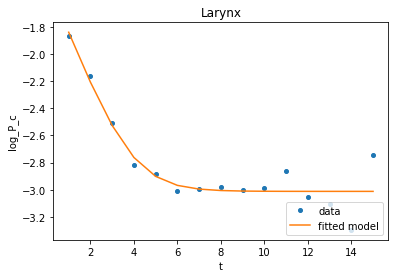

  cause_name         a         b         c
0     Larynx  3.841319  0.404641 -3.011817


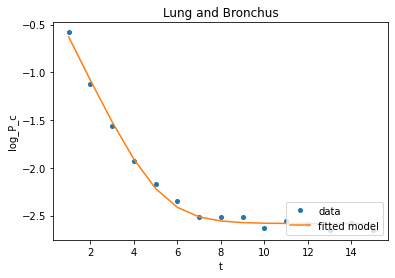

          cause_name         a         b         c
0  Lung and Bronchus  5.173471  0.466879 -2.584217


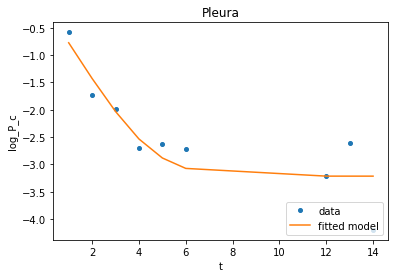

  cause_name         a         b         c
0     Pleura  4.528043  0.685977 -3.216131


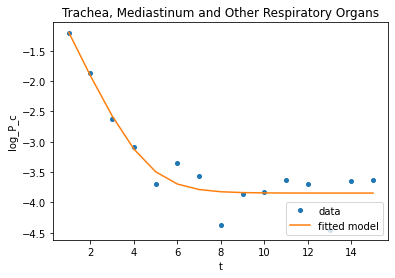

                                          cause_name         a         b  \
0  Trachea, Mediastinum and Other Respiratory Organs  4.475127  0.757138   

          c  
0 -3.846436  


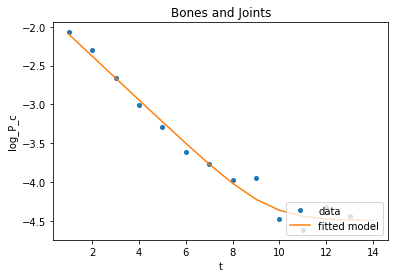

         cause_name         a         b         c
0  Bones and Joints  9.500716  0.282126 -4.494537


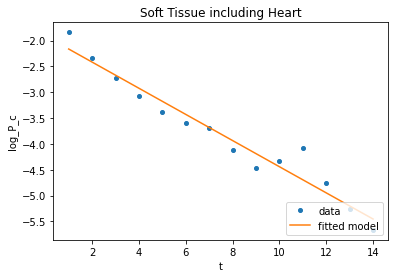

                    cause_name          a         b         c
0  Soft Tissue including Heart  35.097173  0.253103 -10.79357


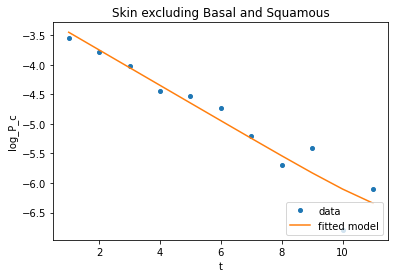

                          cause_name          a         b         c
0  Skin excluding Basal and Squamous  11.899711  0.299244 -6.712318


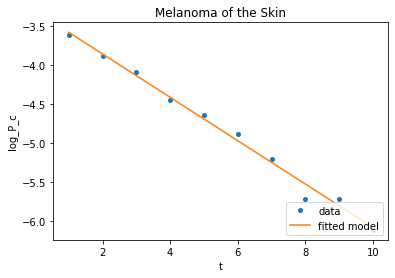

             cause_name          a         b          c
0  Melanoma of the Skin  29.427571  0.277855 -11.474868


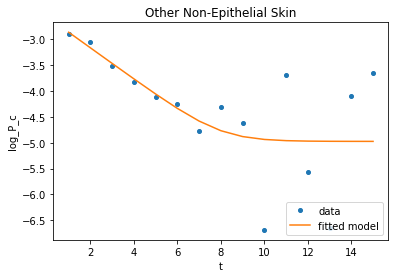

                  cause_name        a         b         c
0  Other Non-Epithelial Skin  7.98055  0.302457 -4.974538


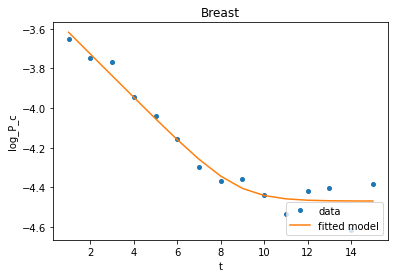

  cause_name         a         b         c
0     Breast  8.764057  0.109776 -4.469452


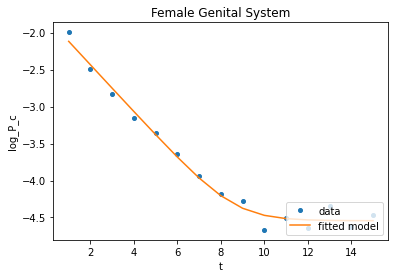

              cause_name         a        b         c
0  Female Genital System  8.642099  0.31737 -4.543827


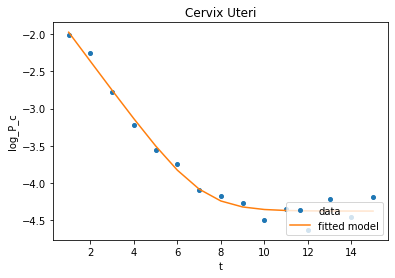

     cause_name         a        b         c
0  Cervix Uteri  7.113128  0.39345 -4.379734


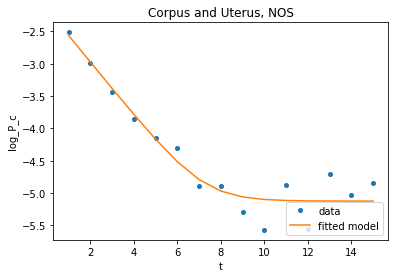

               cause_name         a         b         c
0  Corpus and Uterus, NOS  7.220945  0.411123 -5.123829


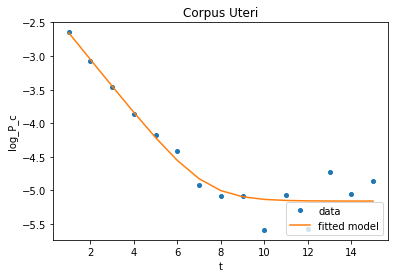

     cause_name         a         b         c
0  Corpus Uteri  7.257721  0.400337 -5.158001


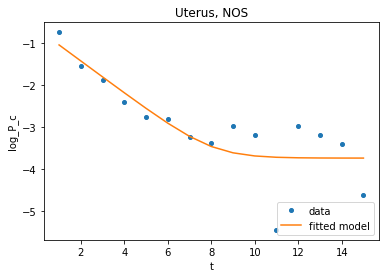

    cause_name         a         b         c
0  Uterus, NOS  8.060432  0.382631 -3.740833


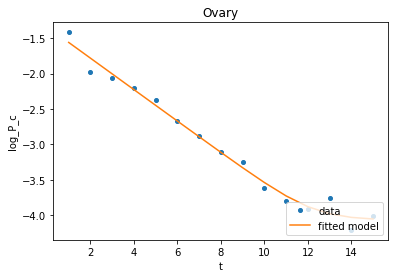

  cause_name          a         b         c
0      Ovary  12.286838  0.222507 -4.070154


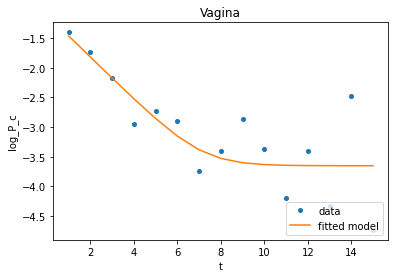

  cause_name         a         b         c
0     Vagina  7.108496  0.357964 -3.651834


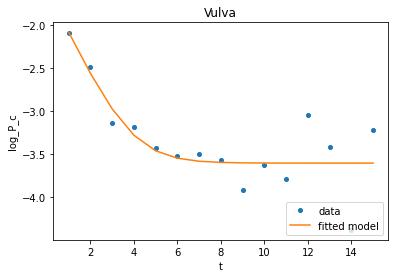

  cause_name         a         b         c
0      Vulva  3.841662  0.525748 -3.602489


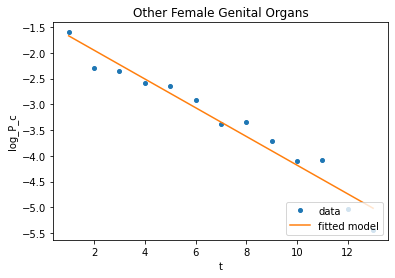

                    cause_name          a         b          c
0  Other Female Genital Organs  33.357336  0.278937 -10.695009


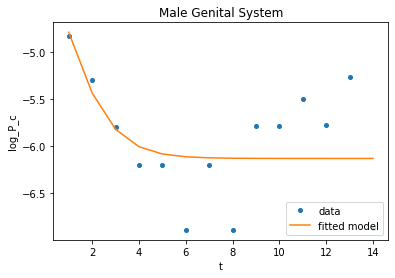

            cause_name         a        b        c
0  Male Genital System  1.901372  1.08081 -6.12744


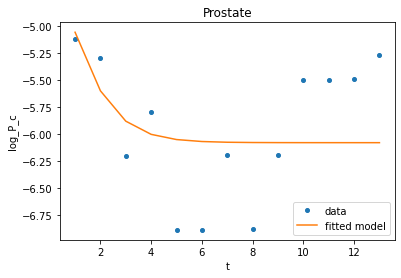

  cause_name         a         b         c
0   Prostate  1.263702  1.231771 -6.080354


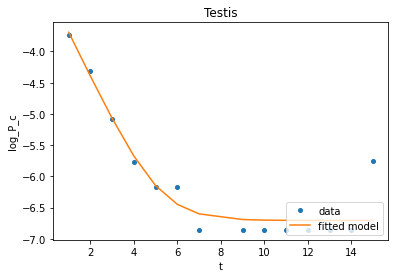

  cause_name         a         b         c
0     Testis  5.147701  0.723524 -6.705384


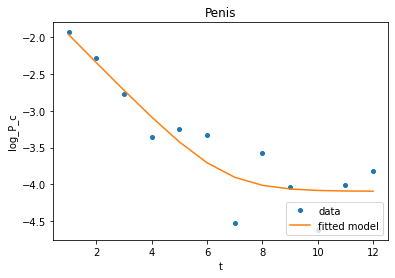

  cause_name        a         b         c
0      Penis  6.56552  0.382384 -4.093736


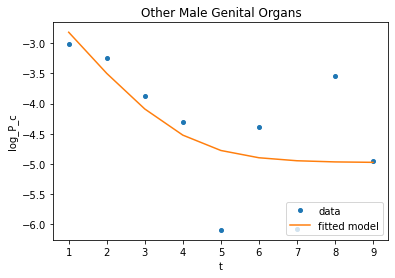

                  cause_name         a         b         c
0  Other Male Genital Organs  3.816022  0.750264 -4.976501


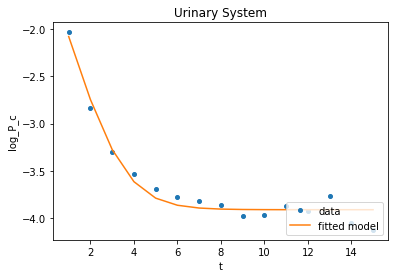

       cause_name         a         b         c
0  Urinary System  3.212221  0.791592 -3.911594


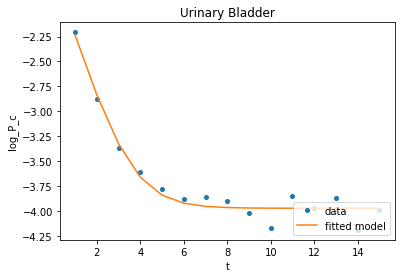

        cause_name         a         b         c
0  Urinary Bladder  3.442799  0.686408 -3.969863


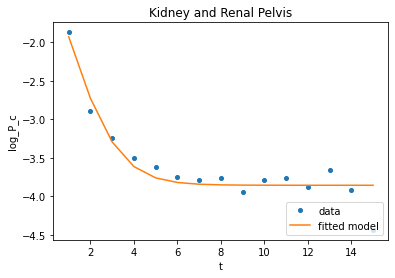

                cause_name         a         b         c
0  Kidney and Renal Pelvis  2.641003  1.060694 -3.857735


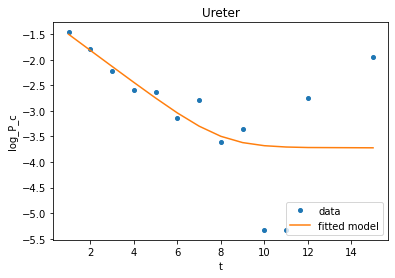

  cause_name         a         b         c
0     Ureter  8.041938  0.315178 -3.722033


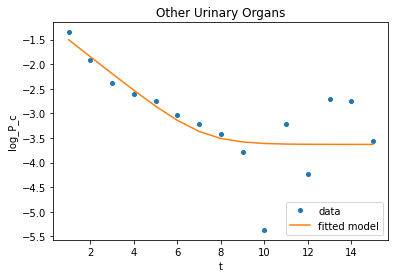

             cause_name         a        b         c
0  Other Urinary Organs  7.128083  0.34692 -3.630671


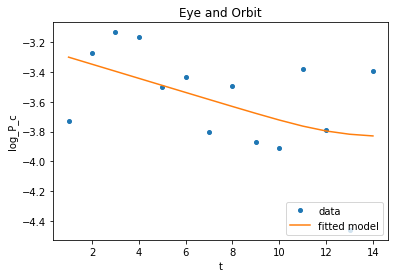

      cause_name          a        b         c
0  Eye and Orbit  12.330049  0.04752 -3.837262


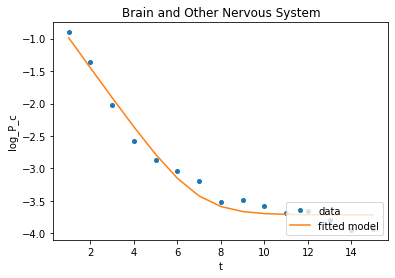

                       cause_name         a         b         c
0  Brain and Other Nervous System  6.856756  0.465585 -3.715565


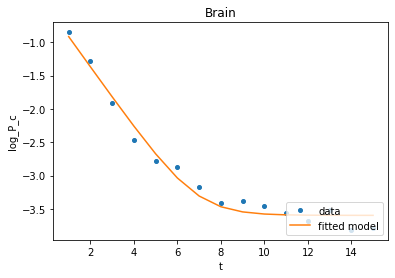

  cause_name         a         b         c
0      Brain  6.884094  0.455325 -3.597105


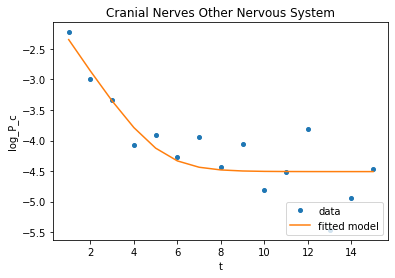

                            cause_name         a         b        c
0  Cranial Nerves Other Nervous System  5.062332  0.530272 -4.50959


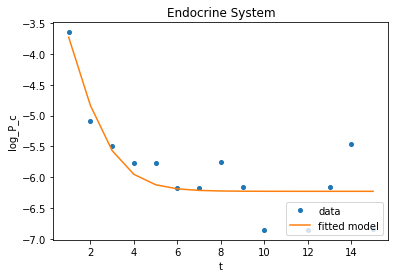

         cause_name         a        b         c
0  Endocrine System  2.327932  1.59813 -6.229519


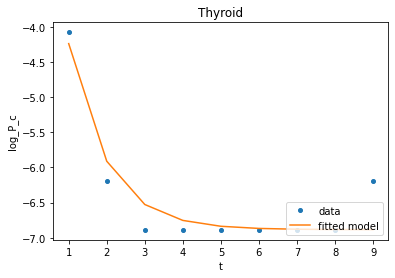

  cause_name        a             b        c
0    Thyroid -8.17132  25475.395037 -6.88525


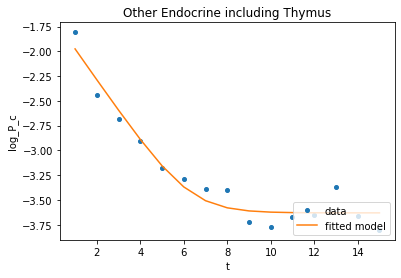

                         cause_name         a         b         c
0  Other Endocrine including Thymus  6.263428  0.314064 -3.630603


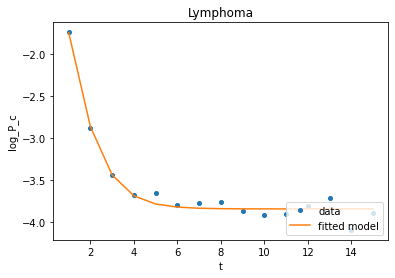

  cause_name         a         b         c
0   Lymphoma  1.219561  2.590184 -3.843177


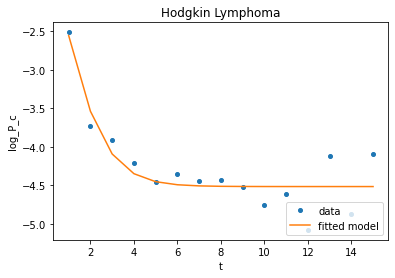

         cause_name        a         b         c
0  Hodgkin Lymphoma  1.65487  1.823159 -4.514231


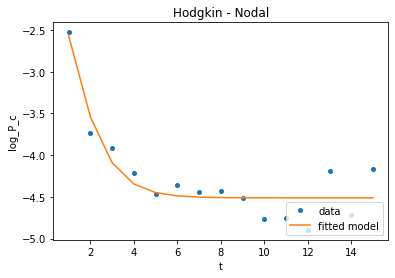

        cause_name         a         b        c
0  Hodgkin - Nodal  1.664296  1.799449 -4.51196


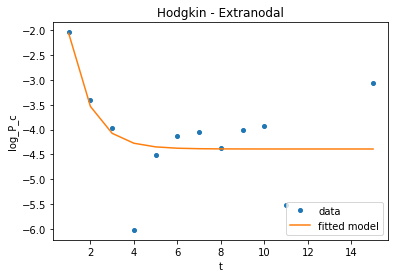

             cause_name         a            b         c
0  Hodgkin - Extranodal -6.776643  5555.112202 -4.392201


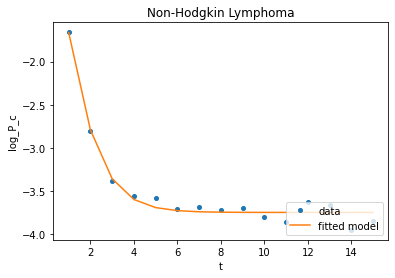

             cause_name         a         b         c
0  Non-Hodgkin Lymphoma  1.100432  2.794674 -3.745441


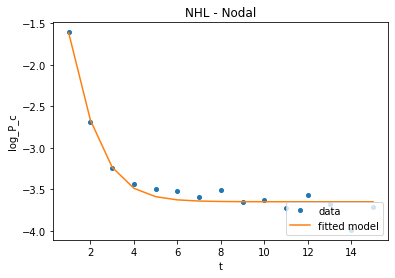

    cause_name         a         b         c
0  NHL - Nodal  1.449419  2.156117 -3.649911


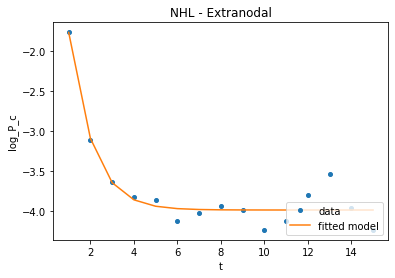

         cause_name         a         b         c
0  NHL - Extranodal -0.077443  7.555931 -3.982734


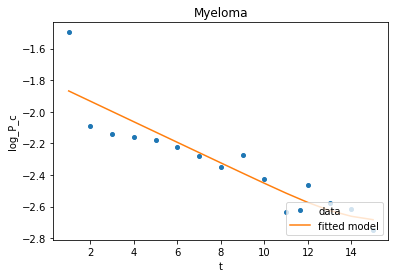

  cause_name          a         b         c
0    Myeloma  13.775655  0.065139 -2.700126


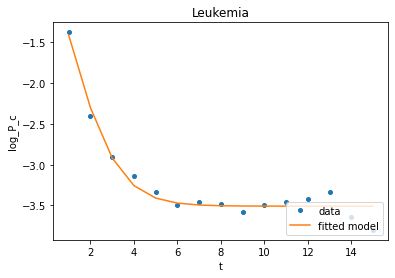

  cause_name         a         b         c
0   Leukemia  2.534078  1.213717 -3.508283


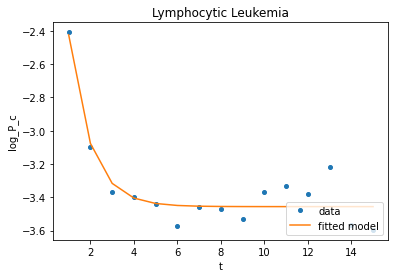

             cause_name         a            b         c
0  Lymphocytic Leukemia -7.130961  3505.515358 -3.455656


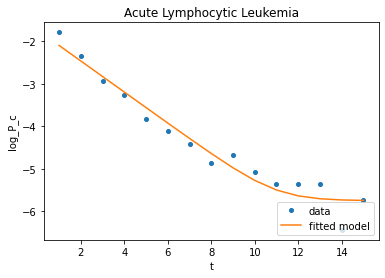

                   cause_name          a         b         c
0  Acute Lymphocytic Leukemia  10.989494  0.366316 -5.753885


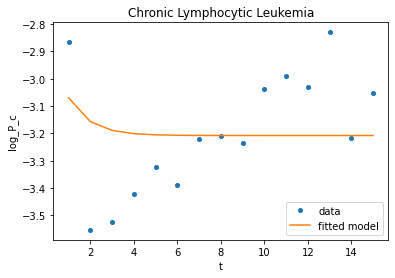

                     cause_name         a            b         c
0  Chronic Lymphocytic Leukemia -8.646146  2128.138833 -3.207806


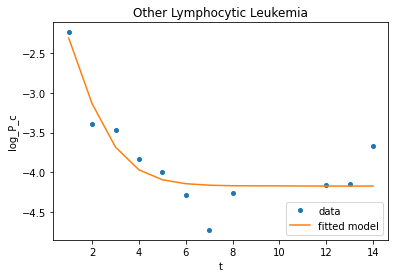

                   cause_name        a         b         c
0  Other Lymphocytic Leukemia  2.31644  1.202375 -4.175469


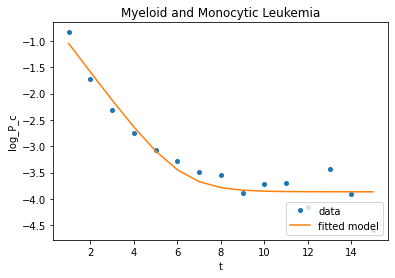

                       cause_name         a         b         c
0  Myeloid and Monocytic Leukemia  6.132386  0.547525 -3.864641


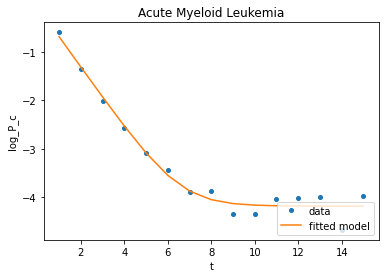

               cause_name         a         b         c
0  Acute Myeloid Leukemia  6.554688  0.631272 -4.189148


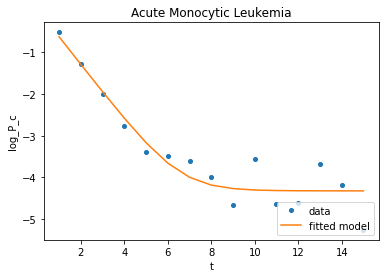

                 cause_name         a         b         c
0  Acute Monocytic Leukemia  6.539916  0.666257 -4.321815


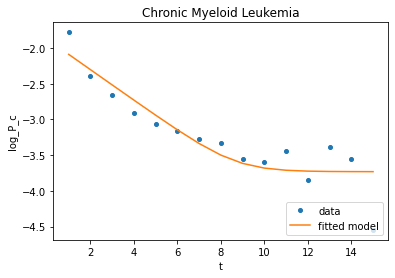

                 cause_name        a         b         c
0  Chronic Myeloid Leukemia  8.66872  0.214346 -3.731516


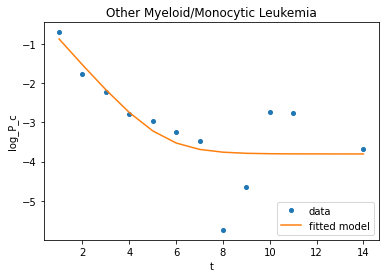

                         cause_name         a         b        c
0  Other Myeloid/Monocytic Leukemia  5.332394  0.673752 -3.80615


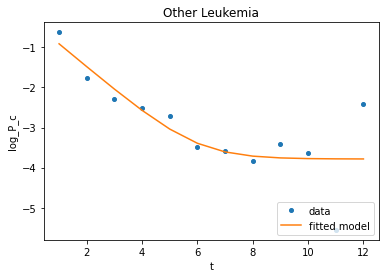

       cause_name         a         b         c
0  Other Leukemia  5.972907  0.576854 -3.784643


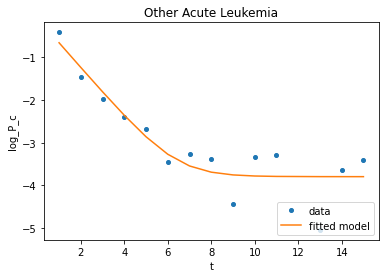

             cause_name         a         b         c
0  Other Acute Leukemia  6.380386  0.582709 -3.795441


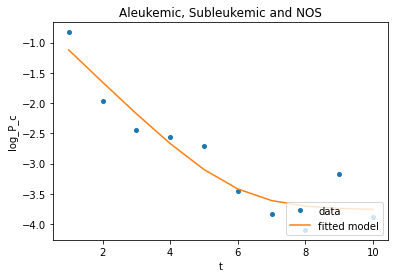

                       cause_name         a         b         c
0  Aleukemic, Subleukemic and NOS  5.892772  0.539829 -3.765755


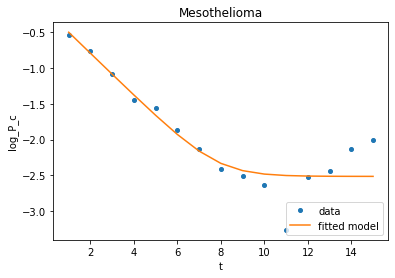

     cause_name         a         b         c
0  Mesothelioma  7.843415  0.293351 -2.512552


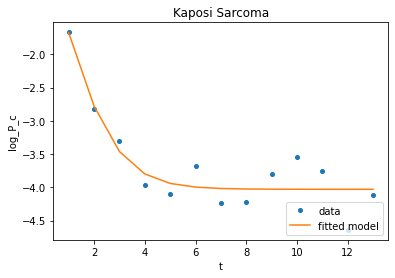

       cause_name         a         b        c
0  Kaposi Sarcoma  2.037303  1.758107 -4.02979


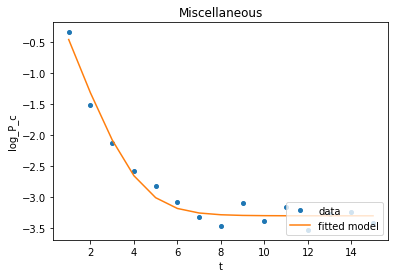

      cause_name        a        b         c
0  Miscellaneous  3.99889  0.93168 -3.299072


In [18]:
parameters = pd.DataFrame(columns = ['cause_name', 'a','b','c'])
for cancer in df.cause_name.unique():
    #for age in with_P_c_no_inf.age_name.unique():
        #cancer = "All Sites"
        #ages = "All Ages"

        data = df[df['cause_name']==cancer]
        #data = data[data['age_name']==age]


        t=data['t']
        y=data['log_P_c']
        res_lsq = least_squares(model, x_0, args=(t,y), loss='linear')
        # other loss functions to try:
        # soft_l1, cauchy
        #weights

        # PLOT
        output = function(res_lsq.x, t)
        plt.plot(t, y, 'o', markersize=4, label='data')
        plt.plot(t, output, label='fitted model')
        plt.xlabel("t")
        plt.ylabel("log_P_c")
        plt.legend(loc='lower right')
        plt.title(cancer)#+": a ="+str(res_lsq.x[0])+" b ="+str(res_lsq.x[1])+" c ="+str(res_lsq.x[2]))
        plt.show()
        
        # SAVE
        row = pd.DataFrame(data={'cause_name': [cancer],
              'a': [res_lsq.x[0]],
              'b': [res_lsq.x[1]],
              'c': [res_lsq.x[2]]})
        print(row)
        parameters = parameters.append(row, ignore_index = True)

In [19]:
parameters.head()

                         cause_name          a           b          c
0                         All Sites   5.486001    0.566051  -4.355350
1           Oral Cavity and Pharynx   4.150743    0.509668  -3.407876
2                               Lip  -7.535811 -173.056428  -3.888515
3                            Tongue   3.866205    0.582127  -3.438999
4                    Salivary Gland  52.225220    0.167383 -11.117194
..                              ...        ...         ...        ...
97             Other Acute Leukemia   6.380386    0.582709  -3.795441
98   Aleukemic, Subleukemic and NOS   5.892772    0.539829  -3.765755
99                     Mesothelioma   7.843415    0.293351  -2.512552
100                  Kaposi Sarcoma   2.037303    1.758107  -4.029790
101                   Miscellaneous   3.998890    0.931680  -3.299072

[102 rows x 4 columns]


In [22]:
parameters.to_csv('/homes/fed1/Survival_Franny/three_parameter_log_form_values_SEER_5_4_2021.csv', index=False)

## To do:

Try age group specific